# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Hifric Aldar Ramadhan
- **Email:** hifricaldar40fmail.com@gmail.com
- **ID Dicoding:** hifric_aldar_sOF0

## Menentukan Pertanyaan Bisnis

- Bagaimana demografi customer yang dimiliki marketplace olist berdasarkan lokasi tempat tinggal?
- jenis payment method apa yang paling sering digunakan customer saat membayar pesanannya?
- kategori produk apakah yang paling banyak dan sedikit dibeli customer?
- pada hari apa jumlah order terbanyak terjadi?
- bagaimana siklus pembelian pertahun-nya tiap minggunya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#get customers dataset
customers_df = pd.read_csv("dataset\olist_customers_dataset.csv")
#get geolocation dataset
geolocation_df = pd.read_csv("dataset\olist_geolocation_dataset.csv")
#get order item dataset
order_items_df = pd.read_csv("dataset\olist_order_items_dataset.csv")
#get order payment dataset
order_payments_df = pd.read_csv("dataset\olist_order_payments_dataset.csv")
#get order review dataset
order_reviews_df = pd.read_csv("dataset\olist_order_reviews_dataset.csv")
#get order dataset
orders_df = pd.read_csv("dataset\olist_orders_dataset.csv")
#get product dataset
products_df = pd.read_csv("dataset\olist_products_dataset.csv")
#get seller dataset
sellers_df = pd.read_csv("dataset\olist_sellers_dataset.csv")
#get product category in english dataset
product_category_name_translation_df = pd.read_csv("dataset\product_category_name_translation.csv")

### Assessing Data

#### #Customers Data

In [3]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


penggunaan tipe data pada dataset customer sudah benar, jadi tidak perlu dilakukan perubahan. tidak terdapat data null juga sehingga tidak perlu dilakukan drop ataupun pengisian missing value. pengecekan terhadap data duplikat juga sudah dilakukan pada baris di atas, berdasarkan hasilnya dapat dilihat bahwa tidak ada data duplikat. 

In [4]:
customers_df.info()
print("number of duplicated value: ", customers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
number of duplicated value:  0


Kesimpulan terkait dataset **customer**: Tidak ada kejanggalan sedikitpun pada dataset. dataset terlihat bagus dan juga siap di explore.

#### #Geolocation Data

In [5]:
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


penggunaan tipe data pada dataset geolocation sudah benar, jadi tidak perlu dilakukan perubahan. tidak terdapat data null juga sehingga tidak perlu dilakukan drop ataupun pengisian missing value. pengecekan terhadap data duplikat juga sudah dilakukan pada baris di atas, berdasarkan hasilnya dapat dilihat bahwa terdapat lebih dari 200 ribu data duplikat, hal ini tentu perlu diselidiki lebih lanjut. 

In [6]:
geolocation_df.info()
print("Number of duplicated Value: ", geolocation_df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Number of duplicated Value:  261831


setelah dilakukan pengecekan lebih lanjut, terlihat bahwa data duplikat merupakan bentuk data lokasi. karena dataset ini hanya menyimpan data berupa lokasi, maka diputuskan untuk melakukan drop data duplikat, proses drop data berfungsi untuk menyimpan 1 data wilayah sebagai perwakilan saja, hal ini tentu akan menambah kualitas dari data itu sendiri.

In [7]:
cek_specific_columns = geolocation_df[geolocation_df.duplicated(['geolocation_zip_code_prefix','geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state'])]
cek_specific_columns

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


Kesimpulan terkait dataset **geolocation**: perlu dilakukan penanganan terhadap data duplikat dengan cara di **drop**

#### #Order Items Data

In [8]:
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


penggunaan tipe data pada dataset order_items terlihat masih ada yang kurang tepat, hal ini terdapat pada kolom *shipping_limit_date* sehingga perlu dilakukan perubahan dari tipe data object ke tipe data datetime. tidak terdapat data null sehingga tidak perlu dilakukan drop ataupun pengisian missing value. pengecekan terhadap data duplikat juga sudah dilakukan pada baris di atas, berdasarkan hasilnya dapat dilihat bahwa tidak terdapat data duplikat. 

In [9]:
order_items_df.info()
print("Number of duplicated value: ", order_items_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Number of duplicated value:  0


setelah dilakukan pengecekan menggunakan method describe(), terlihat tidak ada anomali nilai pada dataset order_items

In [10]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


kesimpulan pada dataset **order_items**: perlu mengubah tipe data untuk kolom *shipping_limit_date*

#### #Order Payments Data

In [11]:
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


penggunaan tipe data pada dataset order_payments terlihat sudah benar, sehingga tidak perlu dilakukan perubahan. tidak terdapat data null sehingga tidak perlu dilakukan drop ataupun pengisian missing value. pengecekan terhadap data duplikat juga sudah dilakukan pada baris di atas, berdasarkan hasilnya dapat dilihat bahwa tidak terdapat data duplikat. 

In [12]:
order_payments_df.info()
print("Number of duplicated value: ",order_payments_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Number of duplicated value:  0


setelah dilakukan pengecekan menggunakan method describe(), terlihat tidak ada anomali nilai pada dataset order_payments

In [13]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


kesimpulan pada dataset **Order_Payments**: tidak ada kesalahan pada dataset, tiap dilakukan explore.

#### #Order Reviews Data

In [14]:
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


penggunaan tipe data pada dataset order_reviews masih tedapat kesalahan, hal ini terjadi pada kolom *review_creation_date* dan *review_answer_timestamp* sehingga perlu dilakukan perubahan dari tipe data object menjadi tipe data datetime. terdapat data null sehingga perlu dilakukan drop ataupun pengisian missing value. pengecekan terhadap data duplikat juga sudah dilakukan pada baris di atas, berdasarkan hasilnya dapat dilihat bahwa tidak terdapat data duplikat. 

In [15]:
order_reviews_df.info()
print("Number of duplicated value: ", order_reviews_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Number of duplicated value:  0


setelah dilakukan pengecekan lebih lanjut terkait data null, terlihat hampir 90% data pada kolom *review_comment_title* itu data null. diputuskanlah untuk tidak menggunakan kedua kolom yang mengandung missing value tersebut, disarankan untuk melakukan drop kolom. 

In [16]:
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Kesimpulan pada dataset **Order_reviews**: perlu dilakukan drop untuk beberapa kolom yang mengandung missing value

#### #Orders Data

In [17]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


penggunaan tipe data pada dataset orders masih tedapat kesalahan, hal ini terjadi pada kolom yang menggandung data berupa datetime namun menggunakan tipe data object. sehingga perlu dilakukan perubahan dari tipe data object menjadi tipe data datetime. terdapat data null sehingga perlu dilakukan drop ataupun pengisian missing value. pengecekan terhadap data duplikat juga sudah dilakukan pada baris di atas, berdasarkan hasilnya dapat dilihat bahwa tidak terdapat data duplikat. 

In [18]:
orders_df.info()
print("Number of duplicated value: ", orders_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Number of duplicated value:  0


setelah dilakukan pengecekan lebih lanjut terkait missing value. diputuskan untuk melakukan drop baris yang memiliki missing value, karena yang missing adalah tanggal, akan aneh jika dilakukan pengisian missing value.

In [19]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Kesimpulan pada dataset **Orders**: mengubah tipe data beberapa kolom dan juga melakukan drop untuk baris yang memiliki nilai null (missing value)

#### #Product Data

In [20]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


penggunaan tipe data pada dataset products sudah benar, sehingga tidak perlu dilakukan perubahan. terdapat data null sehingga perlu dilakukan drop ataupun pengisian missing value. pengecekan terhadap data duplikat juga sudah dilakukan pada baris di atas, berdasarkan hasilnya dapat dilihat bahwa tidak terdapat data duplikat. 

In [21]:
products_df.info()
print("Number of duplicated value: ", products_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Number of duplicated value:  0


setelah dilakukan pengecekan lebih lanjut terkait missing value, terlihat bahwa terdapat 610 baris paling banyak jumlah missing valuenya. *product_category_name* merupakan salah satu kolom yang memiliki missing value, kolom ini tentu tidak bisa dilakukan pengisian data, karena dapat mempengaruhi kualitas data jika salah mengisi tiap barisnya. hal ini menjadi alasan untuk penanganan missing value pada tabel product dilakukan proses drop

In [22]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

pengecekan anomali nilai data dilakukan dengan menggunakan method describe(), terlihat tidak ada anomali pada dataset

In [23]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


kesimpulan pada dataset **Products**: perlu melakukan drop baris untuk missing value

#### #Sellers Data

In [24]:
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


penggunaan tipe data pada dataset sellers sudah benar, sehingga tidak perlu dilakukan perubahan. tidak terdapat data null, sehingga tidak perlu dilakukan drop ataupun pengisian missing value. pengecekan terhadap data duplikat juga sudah dilakukan pada baris di atas, berdasarkan hasilnya dapat dilihat bahwa tidak terdapat data duplikat. 

In [25]:
sellers_df.info()
print("Number of duplicated value: ", sellers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Number of duplicated value:  0


kesimpulan pada dataset **Sellers**: tidak perlu dilakukan cleaning, langsung bisa explore.

#### #Product Category Name Translation Data

In [26]:
product_category_name_translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


penggunaan tipe data pada dataset product_category_name_translation sudah benar, sehingga tidak perlu dilakukan perubahan. tidak terdapat data null, sehingga tidak perlu dilakukan drop ataupun pengisian missing value. pengecekan terhadap data duplikat juga sudah dilakukan pada baris di atas, berdasarkan hasilnya dapat dilihat bahwa tidak terdapat data duplikat. 

In [27]:
product_category_name_translation_df.info()
print("Number of duplicated value: ", product_category_name_translation_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Number of duplicated value:  0


kesimpulan pada dataset **product_category_name_translation**: sudah siap di explore

### Cleaning Data

#### #Geolocation Data

- duplicated data

In [28]:
geolocation_df.drop_duplicates(inplace = True)
geolocation_df.duplicated().sum()

0

#### #Order Items Data

- Change data type

In [29]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], format='%Y/%m/%d %H:%M:%S')
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### #Order Reviews Data

- Missing Value

In [30]:
order_reviews_df.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


- Change dtype

In [31]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'], format='%Y/%m/%d %H:%M:%S')
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'], format='%Y/%m/%d %H:%M:%S')
order_reviews_df

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01,2018-07-02 12:59:13


#### #Orders Data

- Missing Value

In [32]:
orders_df = orders_df.dropna()

- Change Dtype

In [33]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", 
                    "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column], format='%Y/%m/%d %H:%M:%S')


C:\Users\PG 2017\AppData\Local\Temp\ipykernel_10692\394345593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df[column] = pd.to_datetime(orders_df[column], format='%Y/%m/%d %H:%M:%S')
C:\Users\PG 2017\AppData\Local\Temp\ipykernel_10692\394345593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df[column] = pd.to_datetime(orders_df[column], format='%Y/%m/%d %H:%M:%S')
C:\Users\PG 2017\AppData\Local\Temp\ipykernel_10692\394345593.py:5: SettingWithCopyWarning: 
A value is trying to be set

#### #Product Data

- Missing Value

In [34]:
products_df.dropna()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [35]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

### #Explore Customers Data

mengecek dan mengurutkan kota berdasarkan jumlah customer terbanyak pada marketplace olist

In [36]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64

mengecek dan mengurutkan negara bagian berdasarkan jumlah customer terbanyak pada marketplace olist

In [37]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: customer_id, dtype: int64

### #Explore Order Payments Data

setelah dilakukan explore lebih lanjut, ternyata masih terdapat nilai yang tidak akurat, dimana pada kolom *payment_type* terdapat data dengan nilai not_defined. sehingga perlu dilakukan drop agar tipe pembayaran nya jelas.

In [38]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [39]:
not_defined = order_payments_df[order_payments_df['payment_type']=='not_defined']
order_payments_df.drop(not_defined.index, inplace=True)

In [40]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
Name: order_id, dtype: int64

### #Explore Order Data

melakukan pengecekan hari yang paling padat terjadi proses order oleh customer

In [41]:
orders_df['order_day_of_week'] = orders_df['order_purchase_timestamp'].dt.day_name()
orders_per_day = orders_df['order_day_of_week'].value_counts()
orders_per_day

C:\Users\PG 2017\AppData\Local\Temp\ipykernel_10692\2778699508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df['order_day_of_week'] = orders_df['order_purchase_timestamp'].dt.day_name()


Monday       15703
Tuesday      15502
Wednesday    15074
Thursday     14320
Friday       13681
Sunday       11633
Saturday     10548
Name: order_day_of_week, dtype: int64

melakukan pengecekan bulan yang paling padat terjadi proses order oleh customer

In [42]:
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.month_name()
orders_per_month = orders_df['order_month'].value_counts()
orders_per_month

C:\Users\PG 2017\AppData\Local\Temp\ipykernel_10692\3295183490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.month_name()


August       10544
May          10294
July         10028
March         9549
June          9231
April         9101
February      8197
January       7817
November      7288
December      5514
October       4748
September     4150
Name: order_month, dtype: int64

melakukan pengecekan customer yang melakukan order tiap minggu per tahunnya

In [43]:
orders_copy = orders_df.copy()

orders_copy['year'] = orders_copy['order_purchase_timestamp'].dt.year
orders_copy['week'] = orders_copy['order_purchase_timestamp'].dt.week

weekly_sales_per_year = orders_copy.groupby(['year', 'week']).size().reset_index(name='total_sales')

weekly_sales_per_year

C:\Users\PG 2017\AppData\Local\Temp\ipykernel_10692\4192665853.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  orders_copy['week'] = orders_copy['order_purchase_timestamp'].dt.week


,year,week,total_sales
0,2016,37,1
1,2016,40,236
2,2016,41,34
3,2016,51,1
4,2017,1,44
...,...,...,...
86,2018,31,2002
87,2018,32,1931
88,2018,33,1839
89,2018,34,1054


### #Explore Multiple Data

Menggabungkan beberapa dataset sehingga dapat melihat keterhubungan antar dataset

In [44]:
merged_df = pd.merge(orders_df, order_items_df, on='order_id', how='inner')
merged_df = pd.merge(merged_df, customers_df, on='customer_id', how='inner')
merged_df = pd.merge(merged_df, order_payments_df, on='order_id', how='inner')
merged_df = pd.merge(merged_df, order_reviews_df, on='order_id', how='inner')
merged_df = pd.merge(merged_df, products_df, on='product_id', how='inner')
merged_df = pd.merge(merged_df, product_category_name_translation_df, on='product_category_name', how='inner')
merged_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_day_of_week,order_month,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday,October,...,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday,October,...,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday,October,...,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,Tuesday,August,...,2017-08-20 15:16:36,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,Wednesday,August,...,2017-08-08 23:26:23,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113189,b99217b1fcf2fdeace7b8d869b76cb91,8325d6e7af2f2bfb58cf040729b232dd,delivered,2018-03-07 17:42:06,2018-03-07 17:55:36,2018-03-08 20:09:40,2018-03-15 22:04:49,2018-04-02,Wednesday,March,...,2018-03-19 09:12:20,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,fashion_childrens_clothes
113190,3da4b0f0c89bb8fee8a810459e641414,2415312e36eac3ab3819f5b7f32522e5,delivered,2017-06-08 16:46:33,2017-06-08 18:20:19,2017-06-12 15:31:40,2017-06-13 13:23:01,2017-06-23,Thursday,June,...,2017-06-24 21:30:07,fashion_roupa_infanto_juvenil,48.0,488.0,5.0,500.0,36.0,10.0,26.0,fashion_childrens_clothes
113191,ee86b68eb9222b0cad7da50f4f758a35,14acb30bbc064408dcb8cdd3c92b0c97,delivered,2017-05-17 17:44:34,2017-05-17 17:55:12,2017-05-18 16:28:06,2017-05-20 08:44:01,2017-06-09,Wednesday,May,...,2017-05-24 01:52:16,fashion_roupa_infanto_juvenil,52.0,494.0,4.0,600.0,36.0,10.0,26.0,fashion_childrens_clothes
113192,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,delivered,2017-01-26 11:09:00,2017-01-26 11:22:17,2017-01-27 14:59:35,2017-02-14 16:24:01,2017-03-07,Thursday,January,...,2017-02-16 02:54:35,seguros_e_servicos,55.0,506.0,1.0,1225.0,27.0,35.0,15.0,security_and_services


menghapus kolom yang tidak diperlukan

In [45]:
merged_df.drop(columns = ['shipping_limit_date', 'order_approved_at', 'order_delivered_carrier_date', 'shipping_limit_date',
                            'product_description_lenght', 'product_name_lenght', 'product_photos_qty', 'order_delivered_customer_date', 
                            'order_estimated_delivery_date', 'review_answer_timestamp','review_creation_date',
                            'product_width_cm','product_height_cm','product_length_cm','product_weight_g','product_category_name'], inplace= True)


In [46]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113194 entries, 0 to 113193
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113194 non-null  object        
 1   customer_id                    113194 non-null  object        
 2   order_status                   113194 non-null  object        
 3   order_purchase_timestamp       113194 non-null  datetime64[ns]
 4   order_day_of_week              113194 non-null  object        
 5   order_month                    113194 non-null  object        
 6   order_item_id                  113194 non-null  int64         
 7   product_id                     113194 non-null  object        
 8   seller_id                      113194 non-null  object        
 9   price                          113194 non-null  float64       
 10  freight_value                  113194 non-null  float64       
 11  

jumlah kategori produk paling banyak terjual

In [47]:
merged_df.groupby(by="product_category_name_english").order_id.nunique().sort_values(ascending=False).head(10)


product_category_name_english
bed_bath_table           9176
health_beauty            8602
sports_leisure           7484
computers_accessories    6498
furniture_decor          6256
housewares               5709
watches_gifts            5452
telephony                4068
auto                     3791
toys                     3774
Name: order_id, dtype: int64

total keuntungan berdasarkan kategori produk

In [48]:
total_price_by_category = merged_df.groupby('product_category_name_english')['price'].sum()
total_price_by_category_sorted = total_price_by_category.sort_values(ascending=False).head(10)
total_price_by_category_sorted

product_category_name_english
health_beauty            1267072.48
watches_gifts            1207355.40
bed_bath_table           1081890.33
sports_leisure            989555.18
computers_accessories     922482.79
furniture_decor           746376.54
housewares                646232.97
cool_stuff                628288.57
auto                      594877.24
garden_tools              490316.78
Name: price, dtype: float64

### #Input all change to new CSV file

In [49]:
#merged_df.to_csv('olist_ecommerce_cleaned.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana demografi customer yang dimiliki marketplace olist berdasarkan lokasi tempat tinggal?


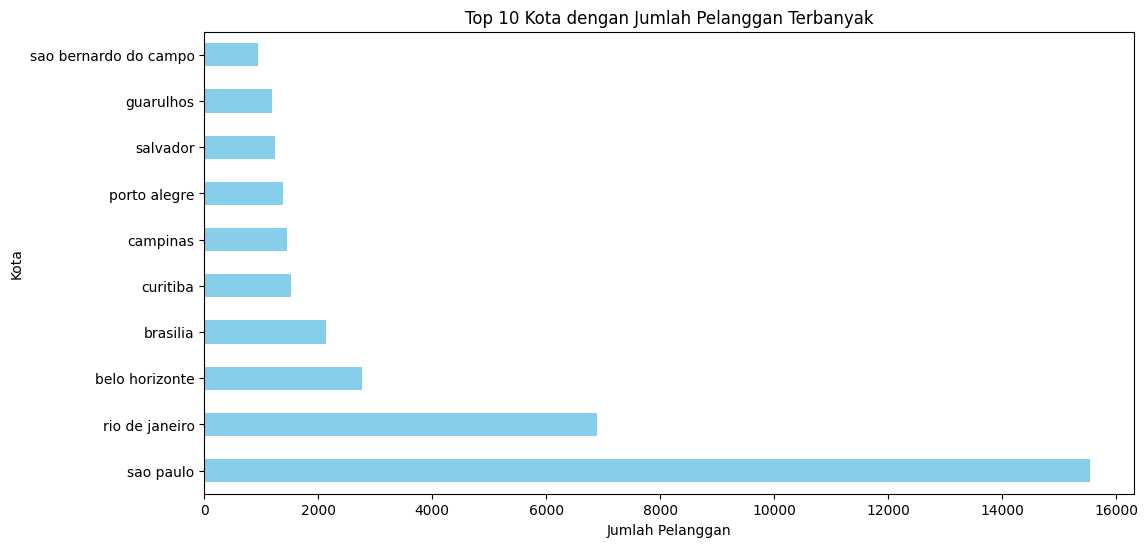

In [50]:
top_cities = customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=True).tail(10)
top_cities = top_cities.iloc[::-1]

plt.figure(figsize=(12, 6))
top_cities.plot(kind='barh', color='skyblue')
plt.title('Top 10 Kota dengan Jumlah Pelanggan Terbanyak')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Kota')
plt.show()

### Pertanyaan 2: jenis payment method apa yang paling sering digunakan customer saat membayar pesanannya?


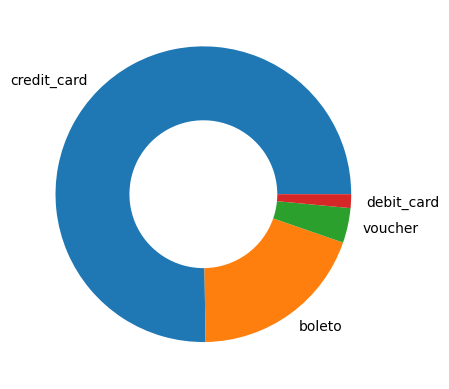

In [51]:
payment_counts = order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

labels = payment_counts.index
sizes = payment_counts.values
plt.pie(
    x=sizes,
    labels=labels,
    wedgeprops = {'width': 0.5}
)
plt.show()

### Pertanyaan 3: kategori produk apakah yang paling banyak dan sedikit dibeli customer?


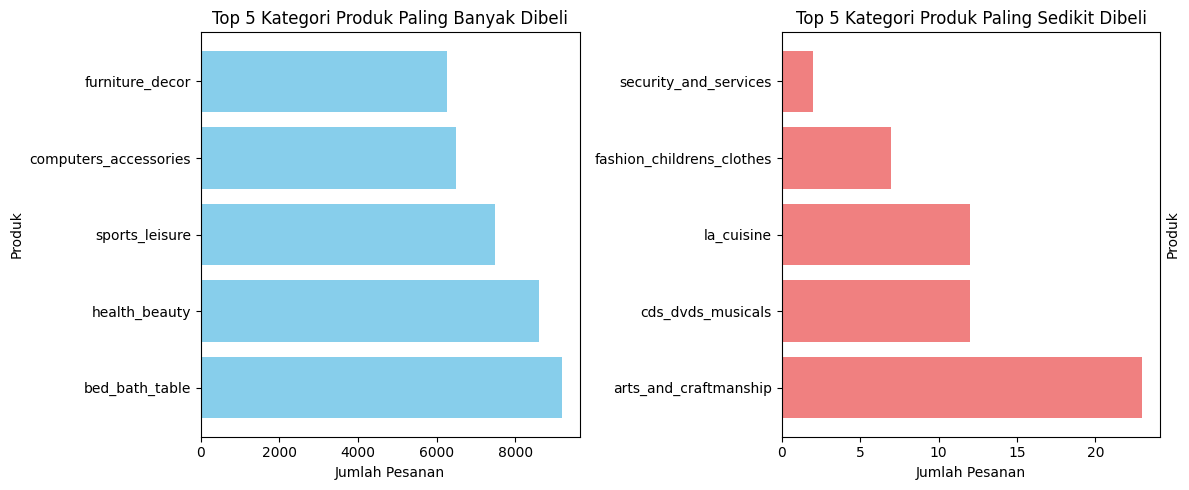

In [52]:
top_products = merged_df.groupby(by="product_category_name_english").order_id.nunique().sort_values(ascending=False).head(5)
bottom_products = merged_df.groupby(by="product_category_name_english").order_id.nunique().sort_values(ascending=True).head(5)

fig, ax = plt.subplots(figsize=(12, 5), ncols=2)
ax[0].barh(top_products.index, top_products.values, color='skyblue')
ax[0].set_title('Top 5 Kategori Produk Paling Banyak Dibeli')
ax[0].set_xlabel('Jumlah Pesanan')
ax[0].set_ylabel('Produk')

ax[1].barh(bottom_products.index[::-1], bottom_products.values[::-1], color='lightcoral')
ax[1].set_title('Top 5 Kategori Produk Paling Sedikit Dibeli')
ax[1].set_xlabel('Jumlah Pesanan')
ax[1].yaxis.set_label_position("right")
ax[1].set_ylabel('Produk')

plt.tight_layout()
plt.show()

### Pertanyaan 4: pada hari apa jumlah order terbanyak terjadi?

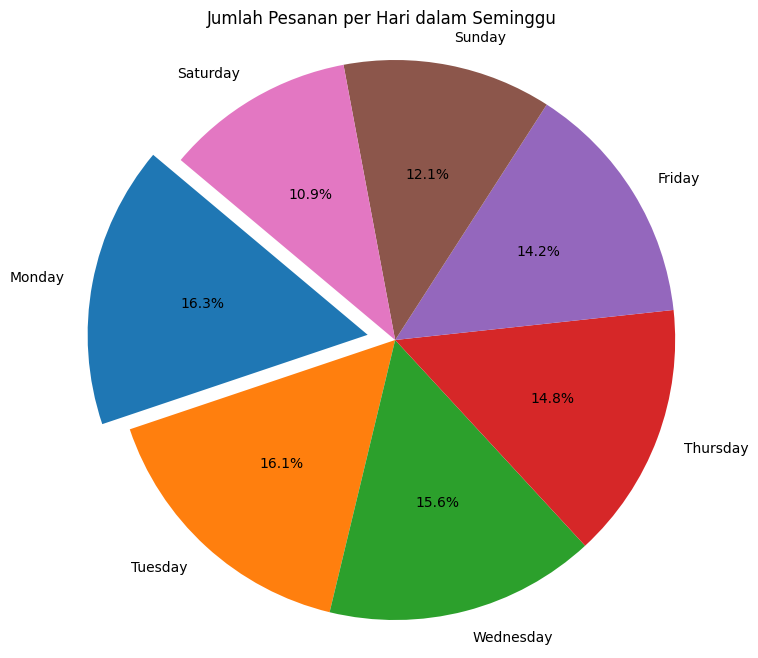

In [53]:
explode = [0] * len(orders_per_day)
explode[orders_per_day.values.argmax()] = 0.1

plt.figure(figsize=(8, 8))
plt.pie(orders_per_day, labels=orders_per_day.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Jumlah Pesanan per Hari dalam Seminggu')
plt.axis('equal') 
plt.show()

### Pertanyaan 5: bagaimana siklus pembelian pertahun-nya tiap minggunya?

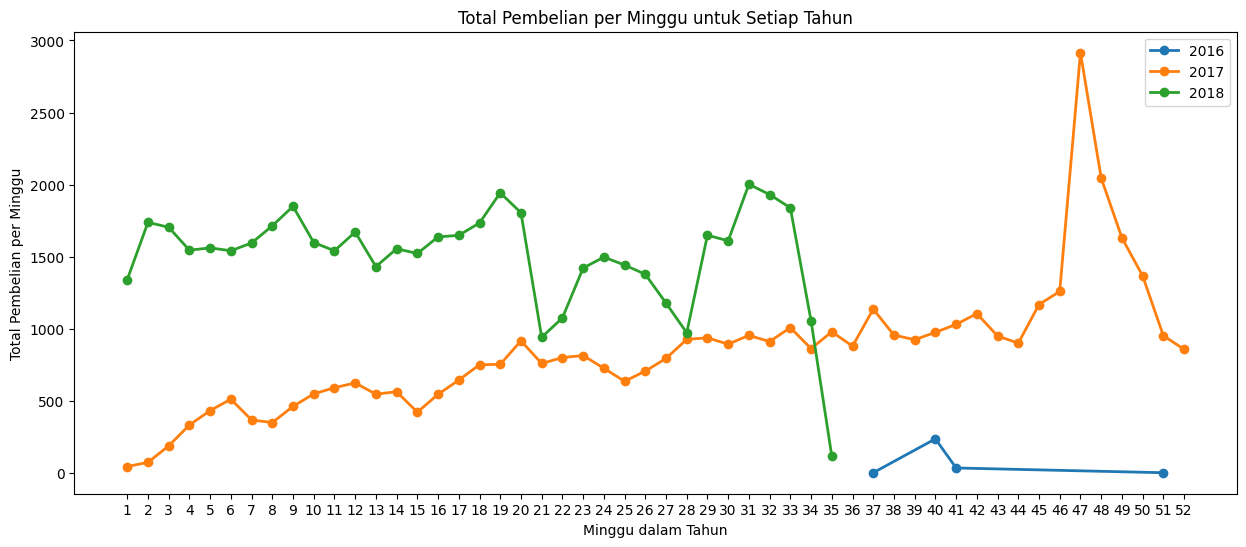

In [54]:
plt.figure(figsize=(15, 6)) 
for year in range(2016, 2019):
    data_year = weekly_sales_per_year[weekly_sales_per_year['year'] == year]
    plt.plot(data_year['week'], data_year['total_sales'],marker='o', 
    linewidth=2, label=str(year))

plt.xlabel('Minggu dalam Tahun')
plt.ylabel('Total Pembelian per Minggu')
plt.title('Total Pembelian per Minggu untuk Setiap Tahun')
plt.legend()

plt.xticks(range(1, 53))
plt.show()

## Conclusion

- Bagaimana demografi customer yang dimiliki marketplace olist berdasarkan lokasi tempat tinggal?  
Berdasarkan pada hasil bar chart untuk nomor pertanyaan tersebut, dari banyaknya tempat yang menjadi lokasi tempat tinggal customer, terdapat 10 lokasi wilayah yang paling banyak jumlah customernya, antara lain dari sao paulo, rio de janeiro, belo horizonte, brasilia, curitiba, campinas, porto alegra, salvador, dan guarulhos.

- jenis payment method apa yang paling sering digunakan customer saat membayar pesanannya?  
terdapat 4 jenis payment yang digunakan yaitu credit card, debit card, voucher, dan belato. berdasarkan pie chart dapat dilihat bahwa credit card yang paling sering digunakan untuk proses pembayaran

- kategori produk apakah yang paling banyak dan sedikit dibeli customer?  
Berdasarkan tampilan bar chart, 5 kategori produk paling sering dibeli adalah bed bath table, health beuty, sport leisure, computer accessories, dan furniture. sedangkan kategori barang yang paling sedikit dibeli adalah security and services, children clothes, la cuisine, music, and art.

- pada hari apa jumlah order terbanyak terjadi?  
Berdasarkan tampilan pie chart, terlihat bahwa hari senin merupakan hari yang paling banyak customer dalam melakukan pembelian, sedangkan hari minggu merupakan hari paling sedikit customer dalam membeli produk

- bagaimana siklus pembelian pertahun-nya tiap minggunya?  
berdasarkan line chart, terlihat bahwa tahun 2016 data pembelian customer dimulai pada minggu ke 37 sehingga hanya terlihat sedikit saja. untuk data tahun 2017 sendiri terjadi lonjakan pembelian pada minggu 47 sampai 48, kemudian mulai menurun lagi di minggu berikutnya. untuk data tahun 2018 sendiri terlihat pembelian oleh customer mengalami kenaikan dibandikangkan dengan awal tahun sebelumnya.